In [1]:
# 导入相关包
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# 导入数据
df = pd.read_csv('F:/pydata/dataset/kaggle/02_trump/Person_Person.csv', encoding='ISO-8859-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
Person A      264 non-null object
Person B      264 non-null object
Connection    264 non-null object
Source(s)     264 non-null object
dtypes: object(4)
memory usage: 8.3+ KB


In [4]:
df.head()

,Person A,Person B,Connection,Source(s)
0,ALEXANDER NIX,BRAD PARSCALE,"Pascale says he hired Nix's company, Cambridge...",https://www.washingtonpost.com/politics/trumps...
1,ALLEN WEISSELBERG,JACK WEISSELBERG,Parent/child,https://www.nytimes.com/2016/05/24/business/de...
2,ANAR MAMMADOV,ZIYA MAMMADOV,Parent/child,https://www.meydan.tv/en/site/politics/13787/
3,ANDREW BREMBERG,MIKE FERGUSON,"Bremberg ""is a lifelong friend"" of Ferguson, a...",https://www.statnews.com/2016/11/15/trump-infl...
4,ANDREW BREMBERG,MITCH MCCONNELL,Policy advisor and counsel on nominations,https://www.linkedin.com/in/andrew-bremberg-71...


In [5]:
 # 从数据框中的 边列表获取图
person_G = nx.from_pandas_edgelist(df, source='Person A', target='Person B', edge_attr='Connection')

In [6]:
# 打印图信息
print(nx.info(person_G))
print('Density: {0}'.format(nx.density(person_G)))

Name: 
Type: Graph
Number of nodes: 232
Number of edges: 264
Average degree:   2.2759
Density: 0.009852216748768473


In [7]:
df[(df['Person A'] == 'DONALD J. TRUMP') | (df['Person B'] == 'DONALD J. TRUMP')].count()

Person A      117
Person B      117
Connection    117
Source(s)     117
dtype: int64

In [8]:
pos = nx.circular_layout(person_G)
#pos = nx.kamada_kawai_layout(person_G)
#pos = nx.shell_layout(person_G)
#pos = nx.spring_layout(person_G)
#pos = nx.random_layout(person_G)

In [9]:
person_betweenness = pd.Series(nx.betweenness_centrality(person_G), name='Betweenness')
person_person = pd.Series.to_frame(person_betweenness)
person_person['Closeness'] = pd.Series(nx.closeness_centrality(person_G))
person_person['PageRank'] = pd.Series(nx.pagerank_scipy(person_G))
desc_betweenness = person_person.sort_values('Betweenness', ascending=False)
print('Top Highest Betweenness Centrality Persons')
desc_betweenness.head(25)

Top Highest Betweenness Centrality Persons


,Betweenness,Closeness,PageRank
DONALD J. TRUMP,0.797563,0.611888,0.193024
JARED KUSHNER,0.155681,0.404468,0.026653
PAUL MANAFORT,0.054282,0.376547,0.016029
STEPHEN MILLER,0.039018,0.376547,0.014088
DONALD TRUMP JR.,0.037851,0.376547,0.014236
IVANKA TRUMP,0.034676,0.395257,0.015367
CHARLES KUSHNER,0.033766,0.285792,0.012184
ELAINE CHAO,0.027216,0.372142,0.007692
REX TILLERSON,0.023057,0.372142,0.006234
BILL STEPIEN,0.019537,0.370697,0.005466


In [10]:
def draw_graph(dataframe, metric):
    nodes = dataframe.index.values.tolist()
    edges = nx.to_edgelist(person_G)
    metric_G = nx.Graph()
    metric_G.add_nodes_from(nodes)
    metric_G.add_edges_from(edges)
    labels = {}

    for node in nodes[:25]:
        labels[node] = node
    plt.figure(1, figsize=(32, 32))

    nx.draw(metric_G, pos=pos, node_size=16, node_color='#8c8c8c', with_labels=False)
    nx.draw_networkx_nodes(metric_G, pos=pos, nodelist=nodes[:25], node_color='#a8071a', nodesize=16)
    nx.draw_networkx_nodes(metric_G, pos=pos, nodelist=nodes[25:], node_color='#8c8c8c', nodesize=16)
    nx.draw_networkx_edges(metric_G, pos=pos, edgelist=edges, arrows=False)
    tmp = nx.draw_networkx_labels(metric_G, pos=pos, labels=labels, font_size=28, font_color='#0050b3')

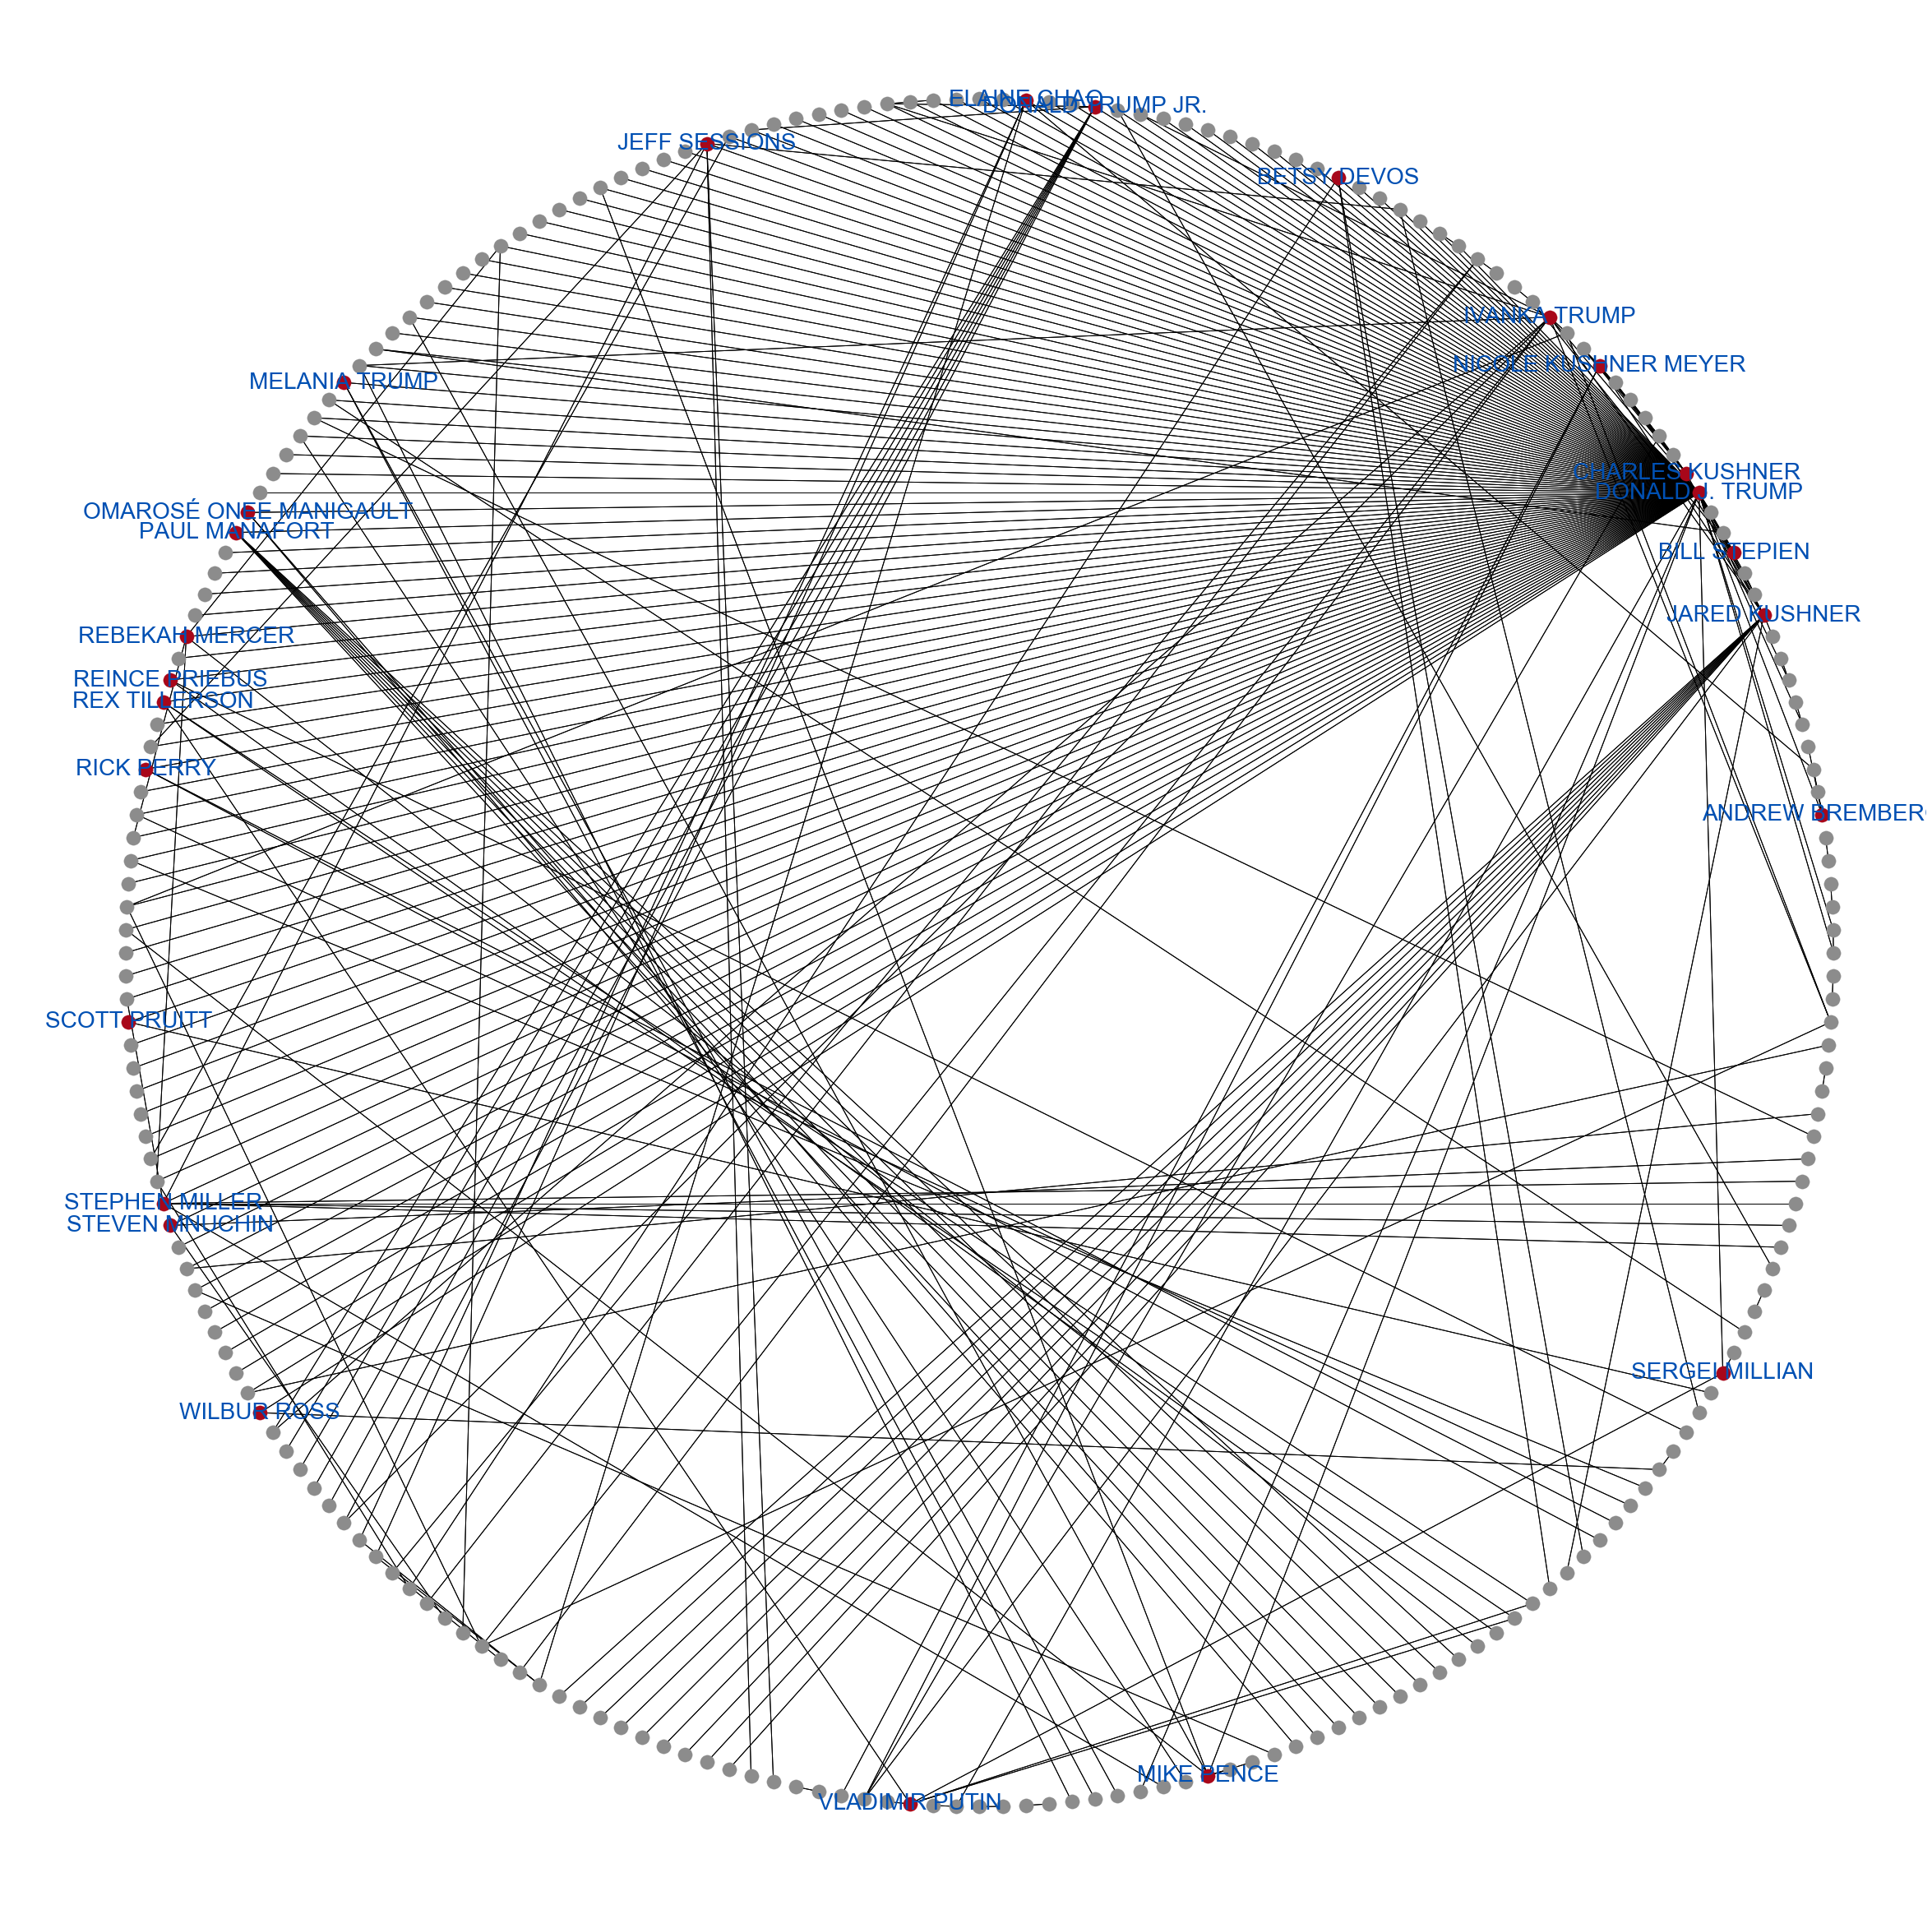

In [11]:
draw_graph(desc_betweenness, 'Betweenness')